# A tidy version of the 2d (single independent variable) approach:

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
""" 
Using the theory introduced in the document:
    > http://faculty.cas.usf.edu/mbrannick/regression/regbas.html
The following functions are defined    
"""

def z(X): # Z-scores for a variable set
    X = np.array(X)
    return (X - np.mean(X))/np.std(X)

def r(X, Y): # correlation score for two variables
    X, Y = np.array(X), np.array(Y)
    
    if len(X) != len(Y):
        raise ValueError("X and Y are arrays of different lengths")
    
    return np.sum(z(X) * z(Y)) / len(X)

def slope(X, Y): # the slope of the linear regression model
    return r(X, Y) * np.std(Y) / np.std(X)

def intercept(X, Y): # the y intercept of the linear regression model
    return np.mean(Y) - slope(X, Y) * np.mean(X)

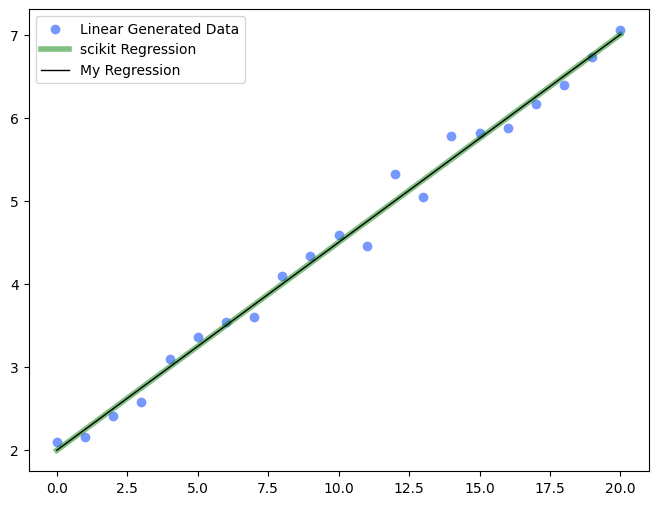

In [ ]:
x_data = np.linspace(0, 20, 21)
y_data = np.linspace(2, 7, 21) + np.random.normal(0, 0.2, 21)

my_slope, my_intercept = slope(x_data, y_data), intercept(x_data, y_data)

model = LinearRegression()
model.fit(x_data.reshape(-1, 1), y_data)

# get slope & intercept
slope_sk = model.coef_[0]
intercept_sk = model.intercept_

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, c="#79F", label="Linear Generated Data")
plt.plot(x_data, slope_sk*x_data + intercept_sk, c="g", linewidth=4, label="scikit Regression", alpha=0.5)
plt.plot(x_data, my_slope*x_data + my_intercept, c='k', linewidth=1, label="My Regression")
plt.legend()
plt.show()

In [ ]:
class LinearRegression2D:
    def __init__(self, X, Y):
        # ensure that X and Y are numpy arrays
        self.X = np.array(X)
        self.Y = np.array(Y)

    @staticmethod
    def _z(Var): # Z-scores for a variable set
        # "var = np.array(var)" is redundant
        # this is because X and Y are already np arrays.
        return (Var - np.mean(Var))/np.std(Var)

    @staticmethod
    def _r(Var, Var2): # correlation score for two variables
        if len(Var) != len(Var2):
            raise ValueError("X and Y are arrays of different lengths")
        
        return np.sum(LinearRegression2D._z(Var) * LinearRegression2D._z(Var2)) / len(Var)

    def Slope(self) -> float:
        return self._r(self.X, self.Y) * np.std(self.Y) / np.std(self.X)
    
    def Intercept(self) -> float:
        return np.mean(self.Y) - self.Slope() * np.mean(self.X)

In [ ]:
"""
Lets try using the class now.
"""

import numpy as np

# generate some data...
N = 1000

x = np.linspace(2, 70, N) + np.random.normal(0, 3, N)
y = np.linspace(40, 292, N) + np.random.normal(0, 30, N)

model = LinearRegression2D(x, y)

print(model.Slope())
print(model.Intercept())

3.6441529678519546
33.95867289692549


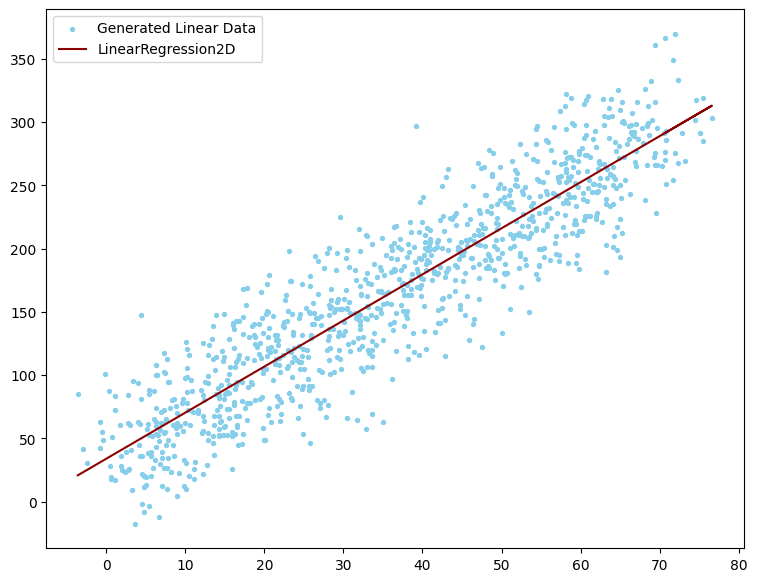

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

plt.scatter(x, y, s=8, c="skyblue", label="Generated Linear Data")
plt.plot(x, x * model.Slope() + model.Intercept(), c="darkred", label="LinearRegression2D")

plt.legend()
plt.show()

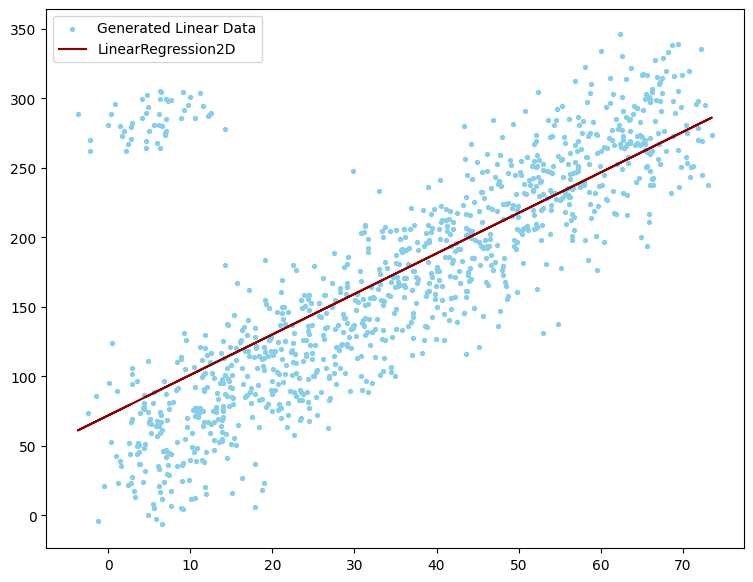

In [ ]:
# generate some data...
N = 1000

x = np.linspace(2, 70, N) + np.random.normal(0, 3, N)
y = np.linspace(40, 292, N) + np.random.normal(0, 30, N)

# random block of points at the top left corner to illustrate constraints of linear regression
points = np.random.multivariate_normal([6, 280], [[20, 0], [0, 150]], 50)

x = np.append(x, points[:, 0])
y = np.append(y, points[:, 1])

model = LinearRegression2D(x, y)

plt.figure(figsize=(9, 7))

plt.scatter(x, y, s=8, c="skyblue", label="Generated Linear Data")
plt.plot(x, x * model.Slope() + model.Intercept(), c="darkred", label="LinearRegression2D")

plt.legend()
plt.show()